In [ ]:
#The code below produces a plot of the Wilson Poisson flow as described in the paper:
#"Visualising the flows of orthogonal polynomial expansions of the Riemann Xi-function".
#The first part precomputes the coefficients of the polynomial expansion and stores it in a file.
#The second part reads the file and produces an implicit plot, i.e. visualises the flow of the real roots.
#The accuracy of the computations depends on:
# 1. the precision of the ComplexBallField (1500), 
# 2. the integral limits (200),
# 3. the number of terms in the expansion (500)
#These have been set such that X^{\mathcal{E}}_1(80) evaluates correctly at more than 20 digits accuracy. 
#Version 1.0, 23 feb 2024 

In [1]:
#Generate a plot of all ordinates of the non-trivial zeros < 80 to overlay the flow graphs
var('y')
m1 = []
with open("ordinateszetazeros.txt", "r") as f: #file is stored on GitHub
    for row in f:
        y=float(row)
        if y < 80:
            m1.append([y,1])

z=list_plot(m1, size=12, marker="o", color = "red")

In [2]:
#Wilson coefficients precomputation e_n
DRF=RealBallField(1500)
CCF=ComplexBallField(1500)
def Phi(x, N):
    termexp2x=-1*DRF(pi)*DRF(2*x).exp()
    termexp5x= 6*DRF(pi)*DRF(5*x/2).exp()
    termexp9x= 4*DRF(pi)*DRF(pi)*DRF(9*x/2).exp()
    sum=(DRF(0))
    for n in range(N):
        summand =  ((n+1)^4*termexp9x-(n+1)^2*termexp5x)*((n+1)^2*termexp2x).exp()   
        sum = sum + summand
    return sum

def tanhfact(x,n):
    tanhf=x.tanh()
    tanhf=tanhf.pow(2*n+2)
    return tanhf

def integrand(x,n):
    integr=Phi(x.abs(),60)*tanhfact(x,n)
    return integr

def en(n,M):
    res=CCF.integral(lambda x, _: integrand(x,n), 0, M)
    return real_part(res)

def genecoeffs(N,M):
    f = open("encoeff", "w")
    for n in range(N):
        f.write(str(en(n,M).mid()));f.write("\r\n")
    f.close() 
    return 0

genecoeffs(500,200)

0

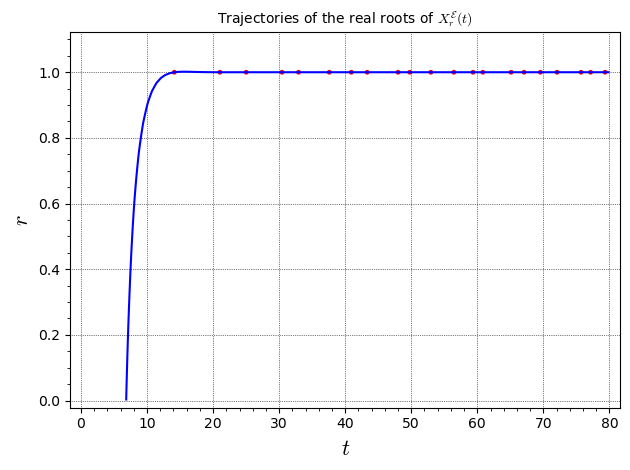

In [4]:
var("r","t");

RDF=RealBallField(1024)
global m1; m1 = []
with open("encoeff", "r") as f:
    for row in f:
        m1.append([RDF(row)])

CCF=ComplexBallField(1500)

def Xi(t):
    f=CCF("0.5",0)+I*CCF()
    xi=f/2*(f-1)*CCF(pi).pow(-f/2)*(f/2).gamma()*f.zeta()
    return xi

def hyp(t,n):
    f1=CCF("0.5",0)+I*CCF(t/4)
    f2=CCF("0.5",0)-I*CCF(t/4)
    hyp=CCF(1,0).hypergeometric([-n,n+2,f1,f2],[3/2,1,3/2])
    return hyp

def WilsonFlow(t,r):
    sum=CCF(0)
    for n in range(500):
        sum=sum+CCF(str(r),0).pow(n)*CCF(str(m1[n]))*hyp(t,n)
    return real_part(Xi(0)-CCF(t).pow(2)*sum);

a=implicit_plot(lambda t,r:((RDF(WilsonFlow(t,r)))),(t,0,80),(r,0,1.1),color='blue',axes_labels=['$t$','$r$'],title=r'Trajectories of the real roots of $X^{\mathcal{E}}_r(t)$',gridlines=True,plot_points=120)
show(a+z,aspect_ratio='automatic')

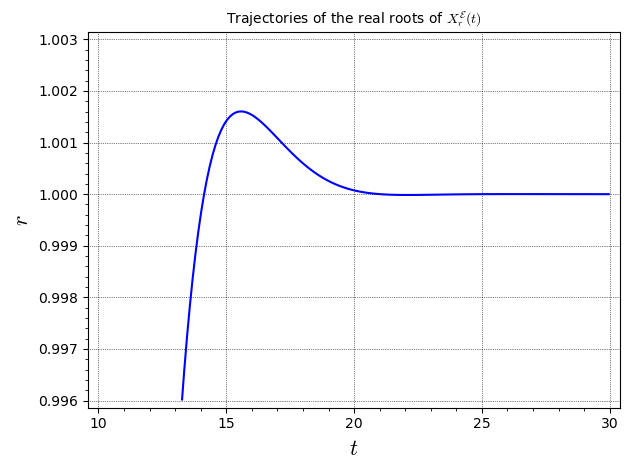

In [9]:
var("r","t");

RDF=RealBallField(1024)
global m1; m1 = []
with open("encoeff", "r") as f:
    for row in f:
        m1.append([RDF(row)])

CCF=ComplexBallField(1500)

def Xi(t):
    f=CCF("0.5",0)+I*CCF()
    xi=f/2*(f-1)*CCF(pi).pow(-f/2)*(f/2).gamma()*f.zeta()
    return xi

def hyp(t,n):
    f1=CCF("0.5",0)+I*CCF(t/4)
    f2=CCF("0.5",0)-I*CCF(t/4)
    hyp=CCF(1,0).hypergeometric([-n,n+2,f1,f2],[3/2,1,3/2])
    return hyp

def WilsonFlow(t,r):
    sum=CCF(0)
    for n in range(500):
        sum=sum+CCF(str(r),0).pow(n)*CCF(str(m1[n]))*hyp(t,n)
    return real_part(Xi(0)-CCF(t).pow(2)*sum);

a=implicit_plot(lambda t,r:((RDF(WilsonFlow(t,r)))),(t,10,30),(r,0.996,1.003),color='blue',axes_labels=['$t$','$r$'],title=r'Trajectories of the real roots of $X^{\mathcal{E}}_r(t)$',gridlines=True,plot_points=180)
show(a,aspect_ratio='automatic')